# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [92]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [93]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [94]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


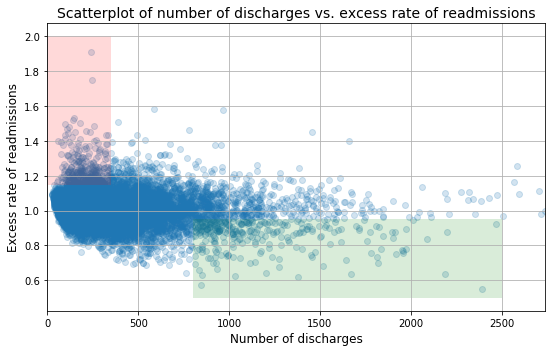

In [95]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**A. Do you agree with the above analysis and recommendations? Why or why not?**

I do not agree with the above analysis and recommendations. First of all, the correlation between higher number of discharges and lower readmission rates is not clear to me. There was not a robust statistical analysis provided to us to verify this claim. Even if the correlation exists, the analysis does not take into account any other variables which may potentially confound the results.

Second, it is not clear to me why the mean excess readmission rate is looked at for hospitals with fewer than 100, or greater than 1000 discharges. These cut-offs seem rather arbitrary, and also fail to consider hospitals of 'medium' size which lie somewhere in the middle. It also is unclear why hospitals with fewer than 300 discharges would be 'required to demonstrate upgraded resource allocation for quality care to continue.' Why was 300 chosen? Ideally we should be looking at all the data, not just the tail ends of it.

**B. Provide support for your arguments and your own recommendations with a statistically sound analysis:**

**1) Setup an appropriate hypothesis test.**

We will be testing if there is a statistically significant correlation between the number of discharges and the expected readmission rate. We'll use linear regression to find the slope of the line of best fit, and compute a p-value testing whether that slope is statistically significantly different from zero. If it is not, then there is reason to suspect that there is no real correlation between discharges and readmission rate.

*H0:* the slope of the line of best fit is equal to zero.

*Ha:* the slope is less than zero.

statistical significance for  𝛼  = .01

**2) Compute and report the observed significance value (or p-value)**

In [96]:
# rename column names of the variables we want to fit model with
clean_hospital_read_df.rename(columns = {"Number of Discharges" : "discharges", 
                                         "Excess Readmission Ratio" : "readmit"},
                             inplace = True)
# import required library
from statsmodels.formula.api import ols

# fit linear regression model
model = ols("readmit ~ discharges", data = clean_hospital_read_df).fit()
print(model.summary())
print("The slope is: %.5f" % model.params[1])
print("The p-value is: %.5f" % model.pvalues[1])

                            OLS Regression Results                            
Dep. Variable:                readmit   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.1
Date:                Tue, 21 May 2019   Prob (F-statistic):           1.22e-25
Time:                        18:16:52   Log-Likelihood:                 11178.
No. Observations:               11497   AIC:                        -2.235e+04
Df Residuals:                   11495   BIC:                        -2.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0181      0.001    769.664      0.0

**3) Report statistical significance for  𝛼  = .01.**

The slope of the line of best fit is ~ 0.00003 with a p-value of 0.00000. This indicates a statistically significant negative correlation between discharge numbers and expected readmission ratio. In other words, we reject the null hypothesis in favor of the alternative hypothesis.

**4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

While the results may show statistical significance, the slope of the line is very close to zero, indicating very little practical significance. There is only a very weak negative correlation between the two variables. Requiring smaller hospitals to upgrade resource allocation or lose quality care operations is not the recommendation I would give, considering that the correlation between hospital size and expected readmission rate is so weak.

**5) Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?**

**Construct another plot that conveys the same information in a more direct manner.**

The advantages are that it gives a view of all of the data, however it doesn't show the differences in readmission ratio for different hospital sizes, for example hospitals with fewer than 300 discharges. We can change the color of the data points to reflect the size. Also, there appear to be more hospitals with fewer discharges, so the data points are bunched up, possibly obscuring the trend. We can resolve this by log-scaling the x-axis.

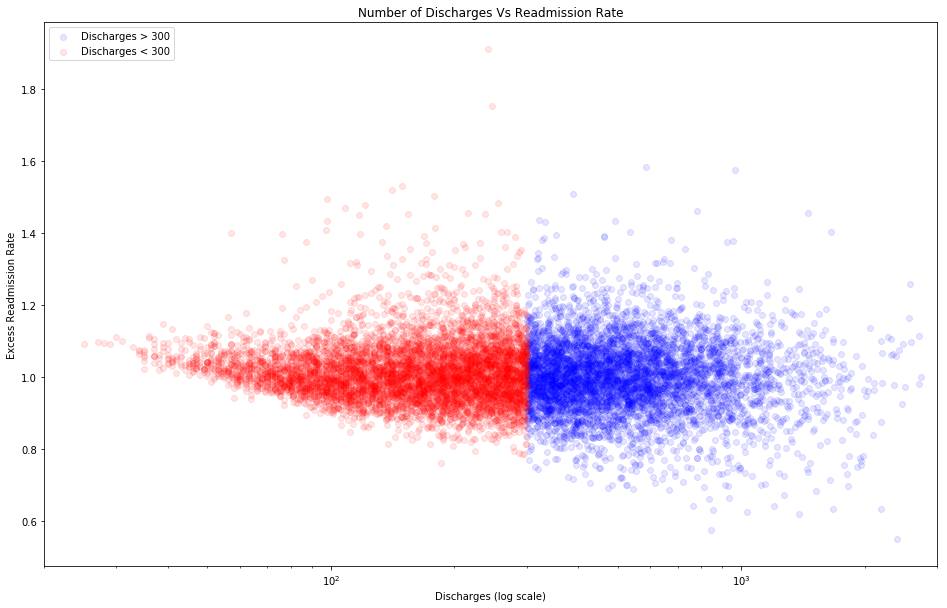

In [97]:
df = clean_hospital_read_df

big = df[df['discharges'] > 300]
small = df[df['discharges'] <= 300]

x_big = [a for a in big['discharges']]
y_big = list(big['readmit'])

x_small = [a for a in small['discharges']]
y_small = list(small['readmit'])

plt.figure(figsize = (16, 10))

plt.scatter(x_big, y_big, alpha = 0.1, color = "blue", label = "Discharges > 300")
plt.scatter(x_small, y_small, alpha = 0.1, color = "red", label = "Discharges < 300")

plt.xlim([20, 3000])
plt.xscale("log")
plt.title("Number of Discharges Vs Readmission Rate")
plt.xlabel("Discharges (log scale)")
plt.ylabel("Excess Readmission Rate")
plt.legend(loc = "upper left")
plt.show()